# Training Models
Up until this point, we've been working with machine learning models as if they were all black boxes, however there are many intricicies to how these models work and why certain models may be more effective than others in different situations. In this section we'll focus on some common regression models, in particular:
* Linear Regression
* Polynomial Regression
* Logistic Regression
* Softmax Regression

## Linear Regression
Generally, a linear model makes a prediction by simply computing a weighted sum of all of the input features, plus a constant called the *bias term* (or *intercept*): $$\hat{y}=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+...+\theta_{n}x_{n}$$.
* $\hat{y}$ is the *predicted value*.
* $n$ is the number of *features*.
* $x_{i}$ is the *$i^{th}$ feature*.
* $\theta_{j}$ is the *$j^{th}$ model parameter* (including the bias term $\theta_{0}$ and the feature weights $\theta_{0}, \theta_{1}, ..., \theta_{n}$).

This is a linear equation, but we can actual write this in what's knows as **vectorized form**:$$\hat{y}=h_{\bf \theta}(\textbf{x})={\bf \theta}\bullet \textbf{x}.$$
* $\bf{\theta}$ is the model's *parameter vector*, containing the bias term $\theta_{0}$ and the feature weights $\theta_{1}$ to $\theta_{n}$.
* $\textbf{x}$ is the instance's *feature vector*, containing $x_{0}$ to $x_{n}$, with $x_{0}$ always equal to 1.
* $\bf{\theta \bullet x}$ is the dot product of the vectors $\bf{\theta}$ and $\bf{x}$, which is of course equal to $\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+...+\theta_{n}x_{n}$.
* $h_{\theta}$ is the hypothesis function, using the model parameters $\bf{\theta}$.

In Machine Learning, vectors are often represented as *column vectors*, which are 2D arrays with a single column. If $\bf{\theta}$ and $\bf{x}$ are column vectors, then the prediction is $$\hat{y}=\bf{\theta^{\bf{T}}x}$$ where $\bf{\theta^{\bf{T}}}$ is the *transpose* of $\bf{\theta}$ (a row vector instead of a column vector) and $\bf{\theta^{\bf{T}}x}$ is the matrix multiplication is $\bf{\theta^{\bf{T}}}$ and $\bf{x}$. It is of course the same prediction, except it is now represented as a single cell matrix rather than a scalar value.

The most common performance measure of a regression model is the **Root Mean Square Error (RSME).** Therefore, to train a linear regression model, you need to find the value of $\bf{\theta}$ thatminimizes the RSME. Ib practice, it is simpler to minimize the **Mean Square Error (MSE)** than the RMSE.

This is calculated using the following equation: $$MSE(\bf{X}, h_{\theta})=\frac{1}{m}\sum_{i=1}^{m}(\bf{\theta^{T}x^{(i)}-y^{(i)}})^{2}$$

### The Normal Equation
To find this $\bf{\theta}$, there is a closed-form solution known as the **normal equation.**: $$\hat{\bf{\theta}}=(\bf{X^{T}}X)^{-1}\bf{X^{T}}y$$
* $\hat{\theta}$ ia the value of $\bf{\theta}$ that minimizes the cost function.
* $y$ is the vector of target values containing $y^{1}$ to $y^{(m)}$

Let's create some linear-looking data:

In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

You can find $\hat{\theta}$ using the `inv()` function from the linear algebra module in NumPy (`np.linalg`)

In [2]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # compute the dot product
theta_best

array([[4.02598307],
       [3.10387674]])

The actual function is $y=4+3x_{1}+$ Gaussian noise, so best case scenerio $\theta_{0}=4$ and $\theta_{1}=3$. Using the normal equation, we've instead calculated $\theta_{0}=3.96033848$ and $\theta_{1}=3.23984268$. 

From here we can make a linear prediction:

In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.02598307],
       [10.23373655]])

We can plot this to get a visual representation:

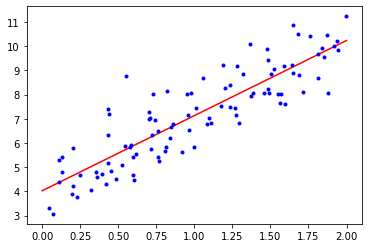

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')

This is essentially what the `LinearRegression` class does, and we can run it as such:

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
lr.intercept_, lr.coef_

(array([4.02598307]), array([[3.10387674]]))

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function:

In [6]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.02598307],
       [3.10387674]])

## Gradient Descent
*Gradient Descent* is a common algorithm used to find the optimal solution to a wide variety of problems. The general idea is to make gradual tweaks to your parameters in order to minimize the cost function. Since the cost function for many linear regression (and other) models is parabolic, this means that we can find a minimum of the function. Since this function is unknown, however, we used a **learning parameter** to learn where on the curve we are, and once we've hit the bottom we're complete!

It's clear to see that the learning parameter is an important part of using gradient descent, as a learning parameter that is too small will take many iterations to find the minimum, while a learning parameter that is too high will overcompensate and thus still take too many iterations.

Since MSE is a *convex* and *continouos function* with a slope that never abruptly changes, using gradient descent is almost guaranteed to get us close to our global minimum.

### Batch Gradient Descent
To calculate the gradient descent, you use this formula:$$\frac{\partial}{\partial \theta_{j}}MSE(\theta)=\frac{2}{m}\sum_{i=1}^{m}(\theta^{T}x^{(i)}-y^{(i)})x_{j}^{(i)}.$$
There's also a closed formula for calculating the gradient descent as well, denoted as $\nabla_{\theta}MSE(\theta)-\theta$. To calculate the next step, we use the learning step (denoted as $\eta$):$$\theta^{(next step)}=\theta-\eta\nabla_{\theta}MSE(\theta).$$
We can see this implemented with code:

In [9]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)
count = 0
for iteration in range(n_iterations):
    gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta-eta*gradients
    count += 1

theta

array([[4.02598307],
       [3.10387674]])

So we can see that we found it! However let's try with different learning rates we may not be able to reach the minimum. Another thing to consider is how to select how many iterations we do, as too few iterations and we may not find our global minimum, and too many iterations and it will take too long. A way around this is to pick some sort of *tolerance* value ($\epsilon$) of which to stop searching.